In [2]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error,r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

In [3]:
import warnings
warnings.filterwarnings('ignore') 

In [4]:
#read files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#when notebook and csv is in the same folder you can run directly

In [5]:
# Merge the data so we can process them together
data = pd.concat((train, test)).reset_index(drop=True)

In [6]:
# Dataset columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#checking head of data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
#check the shape of the data
data.shape

(2919, 81)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [51]:
#The dataset contains several numerical and categorical columns
data.columns.to_series().groupby(data.dtypes).groups

{uint8: ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'Utilities_None', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_

In [10]:
# The statistical summary of the numeric data
data.describe().T #Transpose

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [11]:
# The statistical summary of the categorical  data
data.select_dtypes(include=[object]).describe().T

,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511


#Exploratory Data Analysis

Text(0.5, 1.0, 'Sale Price Trends Over the Years')

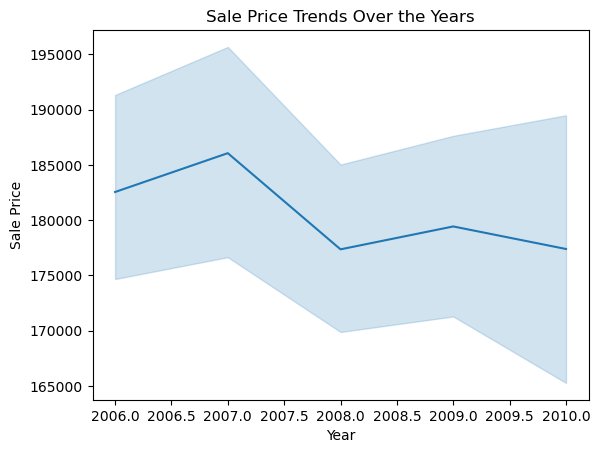

In [12]:
# Sales price trends over the years

pt = sns.lineplot(data=data, x="YrSold", y="SalePrice")

pt.set_xlabel('Year')
pt.set_ylabel('Sale Price')
pt.set_title('Sale Price Trends Over the Years')

Text(0.5, 1.0, 'Average Sale Price by Building Type')

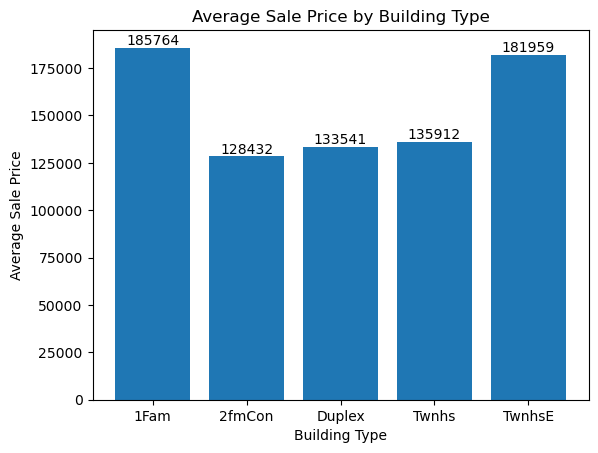

In [13]:
# Average sales price by building type
avg_price = data.groupby('BldgType')['SalePrice'].mean()

fig, pt = plt.subplots()
bars = pt.bar(avg_price.index, avg_price.values)
pt.bar_label(bars)

# Add some text for labels, title 
pt.set_xlabel('Building Type')
pt.set_ylabel('Average Sale Price')
pt.set_title('Average Sale Price by Building Type')

<Axes: >

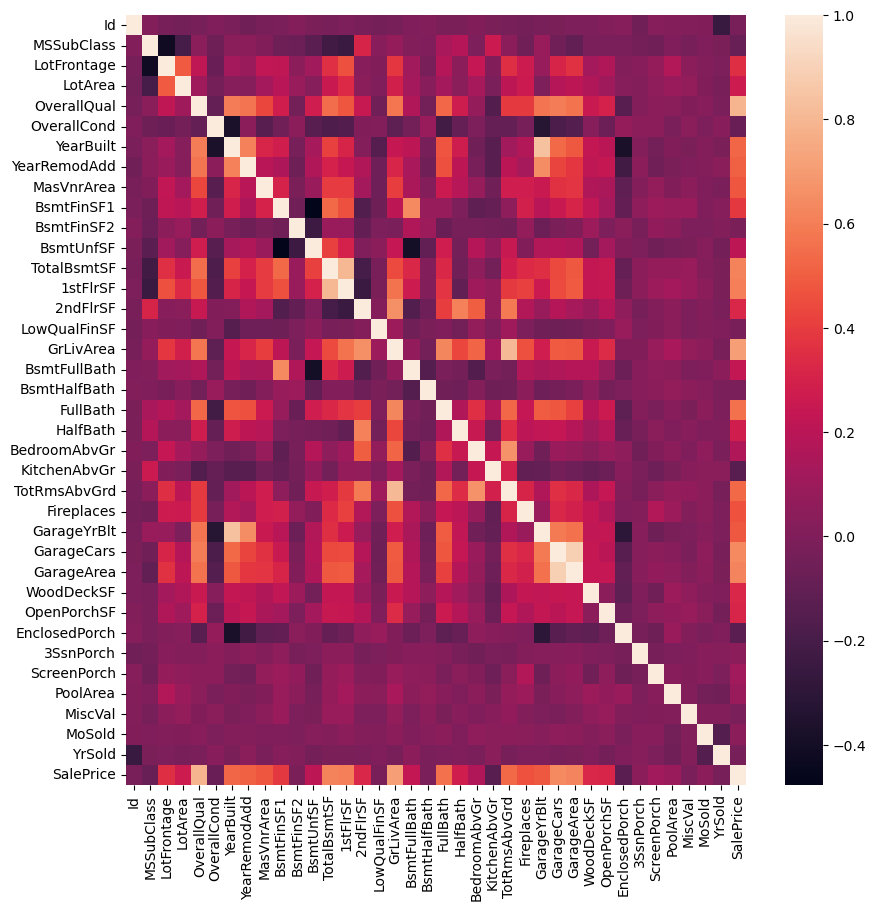

In [14]:
#correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True))

Below are highly correlated variables:
GarageYrBlt and YearBuilt
TotRmsAbvGrd and GrLivArea
1stFlrSF and TotalBsmtSF
GarageArea and GarageCars
The correlation matrix indicates strong correlations between these pairs of variables. This discovery will be influential in our preprocessing steps as we plan to eliminate highly correlated features to prevent any performance loss in our model.

In [15]:
# The correlation to Sale Price
data.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).to_frame()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Text(0.5, 1.0, 'Distribution of SalePrice')

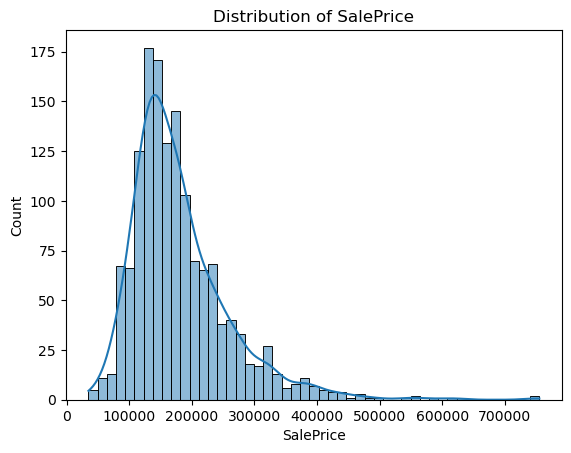

In [16]:
# Distribution of Sale Price (SalePrice - target variable)
pt = sns.histplot(data['SalePrice'],kde = True)
pt.set_title('Distribution of SalePrice')

The distribution of the SalePrice shows that the majority of homes in the dataset are in the price range of $100,000 to $200,000.

In [17]:
ntrain = train.shape[0]
ntest = test.shape[0]
ntrain

1460

Data Processing

In [18]:
 # Converting MSSubClass to string as it is a categorical variable
data["MSSubClass"]= data["MSSubClass"].apply(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [19]:
#Removing values with high correlation to each other and low correlation to saleprice as per correlation map
data = data.drop(['GarageYrBlt','TotRmsAbvGrd','GarageCars'], axis=1) #,'1stFlrSF'

In [20]:
# removing target variable
#data.drop(['SalePrice'], axis=1, inplace=True)

In [21]:
data.shape

(2919, 78)

Shape data: (2919, 78)


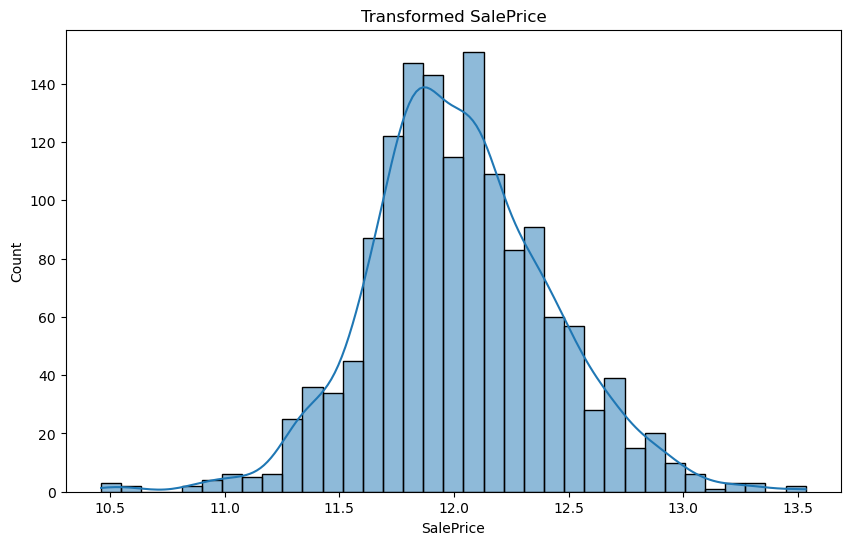

In [22]:
# shape        
print('Shape data: {}'.format(data.shape))

transformed_price = np.log(data['SalePrice'])

plt.figure(figsize=(10,6))
plt.title("Transformed SalePrice")
sns.histplot(transformed_price, kde=True);

In [23]:
# Handling missing values
print('Missing Values ')
data.isnull().sum().sort_values(ascending=False).head(25)

Missing Values 


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Exterior2nd        1
SaleType           1
dtype: int64

In [24]:
data['PoolQC'] = data['PoolQC'].fillna('None')
data['Fence'] = data['Fence'].fillna('None')
data['Alley'] = data['Alley'].fillna('None')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda i: i.fillna(i.median()))

In [25]:
garage_cols = [col for col in data if col.startswith('Garage')]
data[garage_cols]

,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond
0,Attchd,RFn,548.0,TA,TA
1,Attchd,RFn,460.0,TA,TA
2,Attchd,RFn,608.0,TA,TA
3,Detchd,Unf,642.0,TA,TA
4,Attchd,RFn,836.0,TA,TA
...,...,...,...,...,...
2914,NaN,NaN,0.0,NaN,NaN
2915,CarPort,Unf,286.0,TA,TA
2916,Detchd,Unf,576.0,TA,TA
2917,NaN,NaN,0.0,NaN,NaN


In [26]:
# For the quantitative values:
for i in data[garage_cols].select_dtypes(exclude='object').columns:
    data[i] = data[i].fillna(0)

# For the qualitative values:
for i in data[garage_cols].select_dtypes(include='object').columns:
    data[i] = data[i].fillna('None')

In [27]:
basement_cols = [col for col in data if col.startswith('Bsmt')]
# For the quantitative values:
for i in data[basement_cols].select_dtypes(exclude='object').columns:
    data[i] = data[i].fillna(0)

# For the qualitative values:
for i in data[basement_cols].select_dtypes(include='object').columns:
    data[i] = data[i].fillna('None')

In [28]:
mas_cols = [col for col in data if col.startswith('Mas')]

# For the quantitative values:
for i in data[mas_cols].select_dtypes(exclude='object').columns:
    data[i] = data[i].fillna(0)

# For the qualitative values:
for i in data[mas_cols].select_dtypes(include='object').columns:
    data[i] = data[i].fillna('None')

In [29]:
data['MSZoning'] = data.groupby('Neighborhood')['MSZoning'].transform(lambda i: i.fillna(i.value_counts().index[0]))

In [30]:
print('Remaining missing values:')
m_data = data.isnull().sum().sort_values(ascending=False).head(15)
m_data

Remaining missing values:


SalePrice        1459
Utilities           2
Functional          2
TotalBsmtSF         1
KitchenQual         1
Exterior2nd         1
Exterior1st         1
Electrical          1
SaleType            1
Fence               0
FireplaceQu         0
1stFlrSF            0
SaleCondition       0
2ndFlrSF            0
LowQualFinSF        0
dtype: int64

In [31]:
data[m_data.index].dtypes

SalePrice        float64
Utilities         object
Functional        object
TotalBsmtSF      float64
KitchenQual       object
Exterior2nd       object
Exterior1st       object
Electrical        object
SaleType          object
Fence             object
FireplaceQu       object
1stFlrSF           int64
SaleCondition     object
2ndFlrSF           int64
LowQualFinSF       int64
dtype: object

In [32]:
for name in data.select_dtypes("number"):
        data[name] = data[name].fillna(0)
for name in data.select_dtypes("object"):
        data[name] = data[name].fillna("None")

In [33]:
#changing categorical variables with the help of lable encoder
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))


Feature Engineering

In [34]:
#adding features
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']


data['Total_Bath'] = (data['FullBath'] 
                               + (0.5 * data['HalfBath']) 
                               + data['BsmtFullBath'] 
                               + (0.5 * data['BsmtHalfBath'])
                              )
                               

data['Total_porch_sf'] = (data['OpenPorchSF'] 
                              + data['3SsnPorch'] 
                              + data['EnclosedPorch'] 
                              + data['ScreenPorch'] 
                              + data['WoodDeckSF']
                             )

data['TotalLot'] = data['LotFrontage'] + data['LotArea']
data['TotalBsmtFin'] = data['BsmtFinSF1'] + data['BsmtFinSF2']

In [35]:
# creating binary columns that indicate the presence (1) or absence (0) of specific house features
columns = ['MasVnrArea','TotalBsmtSF','2ndFlrSF','WoodDeckSF', 'Fireplaces']

for col in columns:
    col_name = col+'_bin'
    data[col_name] = data[col].apply(lambda x: 1 if x > 0 else 0)
    data.drop(col, inplace=True, axis=1)

data['GarageType'] = data['GarageType'].isna().apply(lambda x: 0 if x else 1)

In [36]:
# One hot encoding categorical data
data = pd.get_dummies(data)

In [37]:
data = data.drop(['Id'], axis=1) 

In [38]:
data.shape

(2919, 225)

Modelling

In [39]:
#Splitting data into training and test set
from sklearn.model_selection import train_test_split, KFold, cross_val_score

train = data[:ntrain]
test = data[ntrain:]

#data.drop(['SalePrice'], axis=1, inplace=True)

X = train.drop(columns = 'SalePrice')
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
#function for the score of root mean square error

def rmse_fn(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [41]:
#Linear Regession
lr = LinearRegression()

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
rmse = rmse_fn(y_test, lr_pred)
r2 = r2_score(y_test, lr_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Root Mean Squared Error: 17000851.290034235
R2 Score: -41418.469913650624


In [42]:
#Ridge Regression
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train,y_train)
rd_pred = ridgeReg.predict(X_test)
rmse = rmse_fn(y_test, rd_pred)
r2 = r2_score(y_test, rd_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Root Mean Squared Error: 31328.72897065946
R2 Score: 0.8593470806581823


In [43]:
#Lasso Regression
lsReg = Lasso(alpha=10)
lsReg.fit(X_train,y_train)
ls_pred = lsReg.predict(X_test)
rmse = rmse_fn(y_test, ls_pred)
r2 = r2_score(y_test, ls_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Root Mean Squared Error: 28073.69516755383
R2 Score: 0.8870562094232098


In [44]:
# Cat Boost Regression

cat_model = CatBoostRegressor(n_estimators=1000, 
                              learning_rate= 0.02, 
                              max_depth=5,
                              verbose=False,
                              model_size_reg=0.7,
                              subsample=0.44,
                              random_strength=1.5,
                              loss_function='RMSE',
                              random_state=2)

cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
rmse = rmse_fn(y_test, cat_pred)
r2 = r2_score(y_test, cat_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Root Mean Squared Error: 24189.661921170147
R2 Score: 0.9161461906493866


In [45]:
# Gradient Boosting Regression

gbr_model = GradientBoostingRegressor(n_estimators=1000,
                                      learning_rate=0.02, 
                                      max_depth=5, 
                                      min_samples_split=2, 
                                      max_features=35, 
                                      random_state=2)

gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)
rmse = rmse_fn(y_test, gbr_pred)
r2 = r2_score(y_test, gbr_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Root Mean Squared Error: 24257.83506487713
R2 Score: 0.91567287826818


In [46]:
# Decision Tree Regression

dt_model = DecisionTreeRegressor(criterion='squared_error',
                                 max_depth=None, 
                                 min_samples_split=2, 
                                 min_samples_leaf=3,
                                 min_weight_fraction_leaf=0.0, 
                                 max_features=None, 
                                 splitter="best",
                                 random_state=2)
    
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
rmse = rmse_fn(y_test, gbr_pred)
r2 = r2_score(y_test, gbr_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Root Mean Squared Error: 24257.83506487713
R2 Score: 0.91567287826818


In [47]:
predictions = cat_model.predict(test.drop(["SalePrice"], axis=1))

In [49]:
# Create a submission file
sample = pd.read_csv('sample_submission.csv')
submission=pd.DataFrame({"Id":sample['Id'],
                         "SalePrice":predictions})
submission.to_csv('submission_final.csv',index=False)

In [50]:
predictions

array([126902.6747456 , 161429.61200906, 183703.67123071, ...,
       163925.1414743 , 124663.16925681, 223708.55247251])